In [1]:
# Import libraries often used in data analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Importing the dataset
Arrests = pd.read_csv('Arrest_Data_from_2010_to_Present.csv')

In [35]:
# Checking to see what the data looks like by printing the first 5 rows
Arrests.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,191811472,05/03/2019,1700.0,18,Southeast,1802,23,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
1,5614161,04/29/2019,1040.0,8,West LA,842,41,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
2,5615197,04/30/2019,615.0,6,Hollywood,663,27,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"
3,5615701,04/30/2019,1100.0,9,Van Nuys,901,2,F,H,NaN,NaN,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)"
4,5615929,04/30/2019,1550.0,20,Olympic,2049,41,M,W,4.0,Aggravated Assault,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)"


In [37]:
# Checking to see attributes of the dataset
Arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310127 entries, 0 to 1310126
Data columns (total 17 columns):
Report ID                   1310127 non-null int64
Arrest Date                 1310127 non-null object
Time                        1309932 non-null float64
Area ID                     1310127 non-null int64
Area Name                   1310127 non-null object
Reporting District          1310127 non-null int64
Age                         1310127 non-null int64
Sex Code                    1310127 non-null object
Descent Code                1310127 non-null object
Charge Group Code           1222098 non-null float64
Charge Group Description    1221577 non-null object
Arrest Type Code            1310127 non-null object
Charge                      1310127 non-null object
Charge Description          1222140 non-null object
Address                     1310127 non-null object
Cross Street                747661 non-null object
Location                    1310127 non-null object
dtypes

In [38]:
# Creating separate columns for year, month and day of arrests

# First, I defined a function to obtain the desired variable
def pickyear(x):
    k = x.split('/')
    return k[2]
def pickmonth(x):
    k = x.split('/')
    return k[0]
def pickday(x):
    k = x.split('/')
    return k[1]

def make_to_str(x):
    return str(x)

In [39]:
# Applying the functions to the Arrest date variable
Arrests['Year'] = Arrests['Arrest Date'].apply(pickyear)
Arrests['Month'] = Arrests['Arrest Date'].apply(pickmonth)
Arrests['Day'] = Arrests['Arrest Date'].apply(pickday)

# Converting Year and Day to numeric data type

Arrests['Year'] = pd.to_numeric(Arrests['Year'], errors='coerce')
Arrests['Day'] = pd.to_numeric(Arrests['Day'], errors='coerce')

In [40]:
# Converting Charge Group code data type to categorical

Arrests['Charge Group Code2'] = Arrests['Charge Group Code'].apply(make_to_str)


In [42]:
# Checking out the new columns in the dataset
Arrests.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,Year,Month,Day,Charge Group Code2
0,191811472,05/03/2019,1700.0,18,Southeast,1802,23,F,B,NaN,...,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)",2019,05,3,nan
1,5614161,04/29/2019,1040.0,8,West LA,842,41,M,H,3.0,...,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)",2019,04,29,3.0
2,5615197,04/30/2019,615.0,6,Hollywood,663,27,M,O,5.0,...,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)",2019,04,30,5.0
3,5615701,04/30/2019,1100.0,9,Van Nuys,901,2,F,H,NaN,...,D,300(B)WIC,NaN,RAYMER,SEPULVEDA BL,"(34.2149, -118.4674)",2019,04,30,nan
4,5615929,04/30/2019,1550.0,20,Olympic,2049,41,M,W,4.0,...,F,245(A)(2)PC,ADW W/FIREARM,8TH ST,VERMONT,"(34.0578, -118.2916)",2019,04,30,4.0


In [43]:
# Checking dataset attributes
Arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310127 entries, 0 to 1310126
Data columns (total 21 columns):
Report ID                   1310127 non-null int64
Arrest Date                 1310127 non-null object
Time                        1309932 non-null float64
Area ID                     1310127 non-null int64
Area Name                   1310127 non-null object
Reporting District          1310127 non-null int64
Age                         1310127 non-null int64
Sex Code                    1310127 non-null object
Descent Code                1310127 non-null object
Charge Group Code           1222098 non-null float64
Charge Group Description    1221577 non-null object
Arrest Type Code            1310127 non-null object
Charge                      1310127 non-null object
Charge Description          1222140 non-null object
Address                     1310127 non-null object
Cross Street                747661 non-null object
Location                    1310127 non-null object
Year  

In [44]:
# For the most part I'm interested in arrests happening prior to this current year, since we aren't done with 2019 

# Creating a new dataframe for data in years prior to 2019
Arrests_p2019 = Arrests[Arrests['Year'] < 2019]
Arrests_p2019.head()


,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,Year,Month,Day,Charge Group Code2
151,4738682,08/01/2016,1835.0,6,Hollywood,645,32,F,O,10.0,...,F,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,1700 N HIGHLAND AV,NaN,"(34.1006, -118.3417)",2016,08,1,10.0
152,4738771,08/01/2016,1835.0,6,Hollywood,645,44,M,O,10.0,...,F,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,1700 N HIGHLAND AV,NaN,"(34.1006, -118.3417)",2016,08,1,10.0
153,4988057,05/14/2017,2215.0,7,Wilshire,755,48,M,W,11.0,...,F,496(A)PC,RECEIVING KNOWN STOLEN PROPERTY >$950,PACKARD,RIDGELEY,"(34.051, -118.3548)",2017,05,14,11.0
154,5060090,08/01/2017,2305.0,18,Southeast,1835,43,M,B,8.0,...,F,422(A)PC,TERRORIZE CAUSING FEAR,10400 ZAMORA AV,NaN,"(33.9424, -118.2517)",2017,08,1,8.0
155,5165092,11/27/2017,2215.0,7,Wilshire,713,26,M,B,11.0,...,F,496(A)PC,RECEIVING KNOWN STOLEN PROPERTY >$950,BEVERLY BL,FAIRFAX AV,"(34.0761, -118.3614)",2017,11,27,11.0


In [45]:
# Get names of columns with missing values
cols_with_missing = [col for col in Arrests_p2019.columns
                     if Arrests_p2019[col].isnull().any()]
cols_with_missing

['Time',
 'Charge Group Code',
 'Charge Group Description',
 'Charge Description',
 'Cross Street']

In [51]:
# Remove rows for which Charge Group Description is missing
Arrests_p2019.dropna(inplace = True)

C:\Users\eyita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


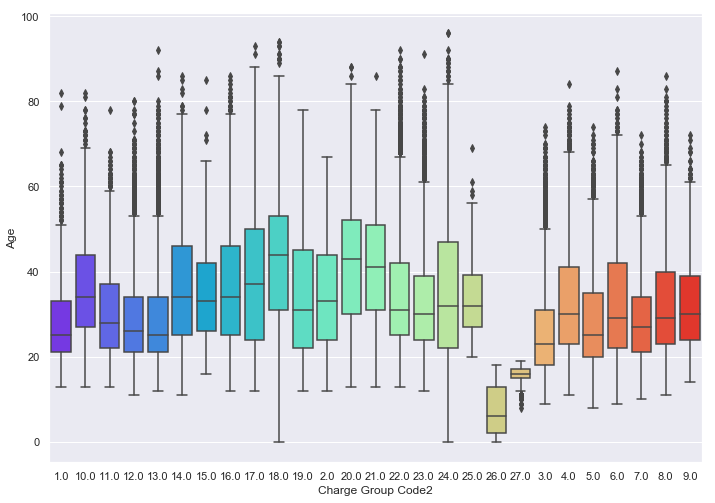

In [52]:
# Box plot showing the age distribution for each charge group code
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="Charge Group Code2", y="Age", data=Arrests_p2019,palette='rainbow')

In [53]:
## Some data exploration focusing on arrests made in 2018

Arrests_2018 = Arrests_p2019[Arrests_p2019['Year'] == 2018]
Arrests_2018.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,Year,Month,Day,Charge Group Code2
156,5213460,01/24/2018,1930.0,6,Hollywood,668,29,M,H,10.0,...,F,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,ST ANDREWS,FOUNTAIN,"(34.0949, -118.3109)",2018,01,24,10.0
157,5257944,03/15/2018,310.0,7,Wilshire,743,33,F,O,1.0,...,F,191.5(B)PC,VEH MANSLAUGHTR/OPER VESSEL DUI & DUR FEL,OLYMPIC,MASSELIN,"(34.0574, -118.3547)",2018,03,15,1.0
162,5406551,08/27/2018,2300.0,18,Southeast,1842,31,M,B,12.0,...,F,25400(A)1PC,CARRY CONCEALED WEAPON IN VEHICLE,109TH ST,GRAND,"(33.9374, -118.2805)",2018,08,27,12.0
166,5430543,09/23/2018,1830.0,13,Newton,1321,25,M,H,24.0,...,F,594(B)(1)PC,VANDALISM W/LOSS VALUED EQ OR > $400,23RD,TRINITY,"(34.0289, -118.2686)",2018,09,23,24.0
167,5449454,10/15/2018,2330.0,1,Central,157,43,M,H,7.0,...,F,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,SPRING,5TH,"(34.0416, -118.244)",2018,10,15,7.0


In [54]:
Arrests_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48794 entries, 156 to 1290595
Data columns (total 21 columns):
Report ID                   48794 non-null int64
Arrest Date                 48794 non-null object
Time                        48794 non-null float64
Area ID                     48794 non-null int64
Area Name                   48794 non-null object
Reporting District          48794 non-null int64
Age                         48794 non-null int64
Sex Code                    48794 non-null object
Descent Code                48794 non-null object
Charge Group Code           48794 non-null float64
Charge Group Description    48794 non-null object
Arrest Type Code            48794 non-null object
Charge                      48794 non-null object
Charge Description          48794 non-null object
Address                     48794 non-null object
Cross Street                48794 non-null object
Location                    48794 non-null object
Year                        48794 non-n

In [55]:
# Question 1: What is the average age of arrested persons for each Charge Group Description

# Solved using the groupby function and an aggregate function- mean

Arrests_2018.groupby('Charge Group Description')['Age'].mean()

Charge Group Description
Against Family/Child              34.086331
Aggravated Assault                34.142333
Burglary                          30.523499
Disorderly Conduct                41.746269
Disturbing the Peace              38.258065
Driving Under Influence           34.831453
Drunkeness                        44.834670
Federal Offenses                  35.250000
Forgery/Counterfeit               33.315534
Fraud/Embezzlement                34.507338
Gambling                          41.571429
Homicide                          29.532609
Larceny                           32.199815
Liquor Laws                       43.913962
Miscellaneous Other Violations    36.875478
Moving Traffic Violations         33.841972
Narcotic Drug Laws                37.178252
Non-Criminal Detention             7.944444
Other Assaults                    33.669325
Pre-Delinquency                   15.714286
Prostitution/Allied               28.794675
Rape                              37.553846
Receive

In [56]:
# Question 2: How many arrests occured with 2 Km of a landmark- Bradbury building (34.050536 -118.247861) in 2018

# First I need to calculate the distance beyween each recorded arrest location and Bradbury building

# I obtained formula for geographical distance calculations from this url- https://en.wikipedia.org/wiki/Geographical_distance

# Defining a function to calculate distances between two gps coordinates

import math

def getdist_bradbury(x):
    R = 6371   # Earth radius in kilometers
    str1 = str(x)
    str2 = str1.strip('()').split(',')
    lat1 = float(str2[0])
    lon1 = float(str2[1])
    lat2 = 34.050536
    lon2 = -118.247861
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    phimean = (phi1 + phi2)/2
    dlambda    = math.radians(lon2 - lon1)
    param2 = math.cos(phimean)*dlambda
    
    a = dphi**2 + (param2**2)
    
    return R*(math.sqrt(a))

In [57]:
# Apply the formula to get distance measurements
Arrests_2018['Dist_brad'] = Arrests_2018['Location'].apply(getdist_bradbury)

C:\Users\eyita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
Arrests_2018.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Charge,Charge Description,Address,Cross Street,Location,Year,Month,Day,Charge Group Code2,Dist_brad
156,5213460,01/24/2018,1930.0,6,Hollywood,668,29,M,H,10.0,...,530.5(A)PC,GET CREDIT/ETC OTHER'S ID,ST ANDREWS,FOUNTAIN,"(34.0949, -118.3109)",2018,01,24,10.0,7.618898
157,5257944,03/15/2018,310.0,7,Wilshire,743,33,F,O,1.0,...,191.5(B)PC,VEH MANSLAUGHTR/OPER VESSEL DUI & DUR FEL,OLYMPIC,MASSELIN,"(34.0574, -118.3547)",2018,03,15,1.0,9.872215
162,5406551,08/27/2018,2300.0,18,Southeast,1842,31,M,B,12.0,...,25400(A)1PC,CARRY CONCEALED WEAPON IN VEHICLE,109TH ST,GRAND,"(33.9374, -118.2805)",2018,08,27,12.0,12.935008
166,5430543,09/23/2018,1830.0,13,Newton,1321,25,M,H,24.0,...,594(B)(1)PC,VANDALISM W/LOSS VALUED EQ OR > $400,23RD,TRINITY,"(34.0289, -118.2686)",2018,09,23,24.0,3.072389
167,5449454,10/15/2018,2330.0,1,Central,157,43,M,H,7.0,...,10851(A)VC,TAKE VEHICLE W/O OWNER'S CONSENT,SPRING,5TH,"(34.0416, -118.244)",2018,10,15,7.0,1.055396


In [61]:
# Arrests within 2 km of Bradbury Building in 2018
Brad_bury2018 = Arrests_2018[Arrests_2018['Dist_brad'] <= 2]
Brad_bury2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7133 entries, 167 to 1290583
Data columns (total 22 columns):
Report ID                   7133 non-null int64
Arrest Date                 7133 non-null object
Time                        7133 non-null float64
Area ID                     7133 non-null int64
Area Name                   7133 non-null object
Reporting District          7133 non-null int64
Age                         7133 non-null int64
Sex Code                    7133 non-null object
Descent Code                7133 non-null object
Charge Group Code           7133 non-null float64
Charge Group Description    7133 non-null object
Arrest Type Code            7133 non-null object
Charge                      7133 non-null object
Charge Description          7133 non-null object
Address                     7133 non-null object
Cross Street                7133 non-null object
Location                    7133 non-null object
Year                        7133 non-null int64
Month    

In [ ]:
# Solution- We can approximate 7,133 arrests within 2 km of Bradbury Building in 2018